<a href="https://colab.research.google.com/github/dianeka0402/PlastiCode-374/blob/main/C23_PS374_PlastiCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://git_token@github.com/PlastiCode-374/ML-PlastiCode.git

Cloning into 'ML-PlastiCode'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), 600 bytes | 600.00 KiB/s, done.


In [2]:
# Menyambungkan antara google colab dengan google drive
# sehingga folder drive akan tertampil di folder colab
from google.colab import drive
drive.mount('/content/drives/')

Mounted at /content/drives/


In [3]:
import cv2
from google.colab.patches import cv2_imshow

# (Optional) menampilkan data dari google drive dengan memasukkan nama path
#img=cv2.imread('/content/drives/MyDrive/Capstone/data jenis plastik/hdpe/124153_10-12-2019_16-17-51.jpeg', cv2.IMREAD_UNCHANGED)

#cv2_imshow(img)
#print(img.shape)

In [4]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import os
import sys

from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras import callbacks

In [6]:
base_dir = '/content/drives/MyDrive/data jenis plastik'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# direktori untuk training data
hdpe_train_dir = os.path.join(train_dir, 'hdpe')
ldpe_train_dir = os.path.join(train_dir, 'ldpe')
other_train_dir = os.path.join(train_dir, 'other')
pet_train_dir = os.path.join(train_dir, 'pet')
pp_train_dir = os.path.join(train_dir, 'pp')
ps_train_dir = os.path.join(train_dir, 'ps')
pvc_train_dir = os.path.join(train_dir, 'pvc')

# direktori untuk validasi data
hdpe_validation_dir = os.path.join(validation_dir, 'hdpe')
ldpe_validation_dir = os.path.join(validation_dir, 'ldpe')
other_validation_dir = os.path.join(validation_dir, 'other')
pet_validation_dir = os.path.join(validation_dir, 'pet')
pp_validation_dir = os.path.join(validation_dir, 'pp')
ps_validation_dir = os.path.join(validation_dir, 'ps')
pvc_validation_dir = os.path.join(validation_dir, 'pvc')

Melihat Isi Dataset

In [8]:
import os

train_hdpe_dir = '/content/drives/MyDrive/Capstone/data jenis plastik/train/hdpe'
hdpe_train_fnames = os.listdir(train_hdpe_dir)
print(hdpe_train_fnames[:10])

train_ldpe_dir = '/content/drives/MyDrive/Capstone/data jenis plastik/train/ldpe'
ldpe_train_fnames = os.listdir(train_ldpe_dir)
print(ldpe_train_fnames[:10])

train_other_dir = '/content/drives/MyDrive/Capstone/data jenis plastik/train/other'
other_train_fnames = os.listdir(train_other_dir)
print(other_train_fnames[:10])

train_pet_dir = '/content/drives/MyDrive/Capstone/data jenis plastik/train/pet'
pet_train_fnames = os.listdir(train_pet_dir)
print(pet_train_fnames[:10])

train_pp_dir = '/content/drives/MyDrive/Capstone/data jenis plastik/train/pp'
pp_train_fnames = os.listdir(train_pp_dir)
print(pp_train_fnames[:10])

train_ps_dir = '/content/drives/MyDrive/Capstone/data jenis plastik/train/ps'
ps_train_fnames = os.listdir(train_ps_dir)
print(ps_train_fnames[:10])

train_pvc_dir = '/content/drives/MyDrive/Capstone/data jenis plastik/train/pvc'
pvc_train_fnames = os.listdir(train_pvc_dir)
print(pvc_train_fnames[:10])

['IMG_6762.jpg', 'IMG_6266.jpg', 'IMG_7054.jpg', 'IMG_6421.jpg', 'IMG_6839.jpg', 'IMG_6588.jpg', 'IMG_7207.jpg', 'IMG_7171.jpg', 'IMG_6261.jpg', 'IMG_6332.jpg']
['IMG_20191229_141403.jpg', 'IMG_20191229_141451.jpg', 'IMG_20191229_141439.jpg', 'IMG_20191229_141329.jpg', 'IMG_20191229_141353.jpg', 'IMG_20191229_141629.jpg', '1943498Plastikp.jpeg', 'IMG_20191229_141216.jpg', 'IMG_20191229_141512.jpg', '693fe816-df47-4222-8016-4afd419401ce.jpeg']
['IMG_6992.jpg', 'IMG_6740.jpg', 'IMG_6621.jpg', 'IMG_7194.jpg', 'IMG_7221.jpg', 'IMG_6892.jpg', 'BMOY1981.jpg', 'IMG_6329.jpg', 'IMG_6819.jpg', 'IMG_7211.jpg']
['BBOZ2526.jpg', 'HSBT4561.jpg', 'FQCK7421.jpg', 'BIGI9753.jpg', '85943598-ec9b-4da5-9221-8c32b5742e72.jpg', 'AORA7148.jpg', 'IMG_6831.jpg', 'TLZO0446.jpg', 'IMG_6359.jpg', 'IMG_6538.jpg']
['IMG_6410.jpg', 'IMG_6553.jpg', 'IMG_6614.jpg', 'IMG_6417.jpg', 'IMG_6580.jpg', 'IMG_6338.jpg', 'IMG_6370.jpg', 'IMG_6254.jpg', '4ef1da2d-660e-4ffb-b0b8-df58e4f90fac.jpg', 'IMG_6252.jpg']
['IMG_9691.jpg

In [9]:
print('total training hdpe:', len(os.listdir(train_hdpe_dir)))
print('total training ldpe:', len(os.listdir(train_ldpe_dir)))
print('total training other:', len(os.listdir(train_other_dir)))
print('total training pet:', len(os.listdir(train_pet_dir)))
print('total training pp:', len(os.listdir(train_pp_dir)))
print('total training ps:', len(os.listdir(train_ps_dir)))
print('total training pvc:', len(os.listdir(train_pvc_dir)))

total training hdpe: 176
total training ldpe: 67
total training other: 168
total training pet: 281
total training pp: 262
total training ps: 90
total training pvc: 92


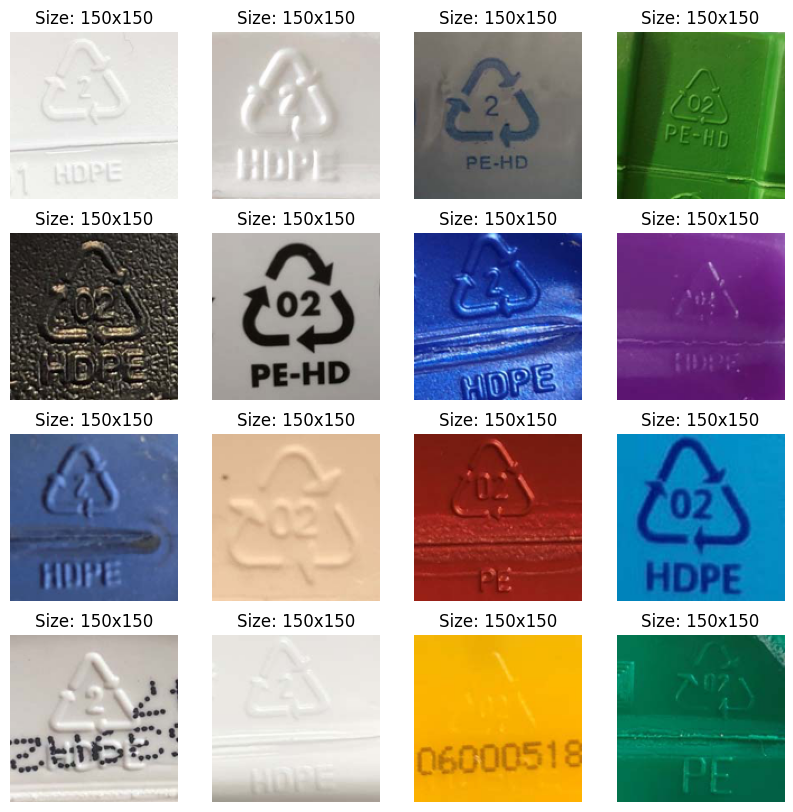

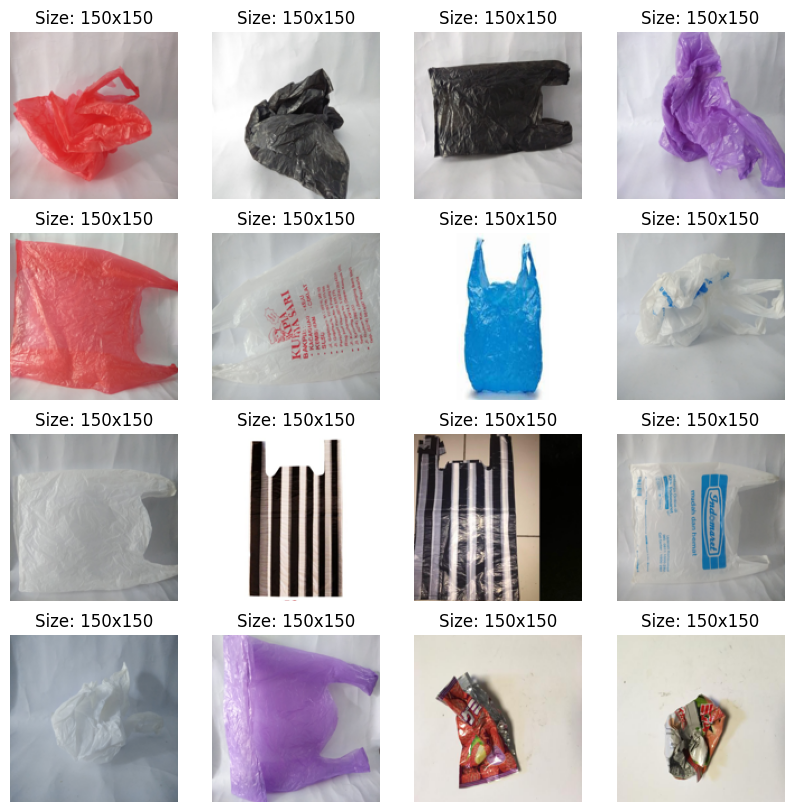

In [10]:
%matplotlib inline

# Tes Menampilkan gambar matplotlib
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

nrows = 4
ncols = 4
target_size = (150, 150)  # Specify the desired target size for the images

pic_index = 0

# Display HDPE images
plt.figure(figsize=(10, 10))
for i, fname in enumerate(hdpe_train_fnames[pic_index:pic_index+nrows*ncols]):
    img_path = os.path.join(train_hdpe_dir, fname)
    img = Image.open(img_path)
    img = img.resize(target_size)  # Resize the image
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Size: {img.size[0]}x{img.size[1]}')
plt.show()

# Display LDPE images
plt.figure(figsize=(10, 10))
for i, fname in enumerate(ldpe_train_fnames[pic_index:pic_index+nrows*ncols]):
    img_path = os.path.join(train_ldpe_dir, fname)
    img = Image.open(img_path)
    img = img.resize(target_size)  # Resize the image
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Size: {img.size[0]}x{img.size[1]}')
plt.show()

**Setting Arsitektur CNN (Konvolusi)**

In [11]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

**Compile CNN**

In [12]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

**Setting Preparasi Dataset**

In [14]:
from keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/drives/MyDrive/Capstone/data jenis plastik/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/drives/MyDrive/Capstone/data jenis plastik/validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 1132 images belonging to 7 classes.
Found 234 images belonging to 7 classes.


In [ ]:
# Train the model
history = model.fit(train_generator, 
                    epochs=100, 
                    # nanti coba epoch=100,
                    validation_data = validation_generator, 
                    verbose = 1, 
                    validation_steps=3)

Epoch 1/100
9/9 [==============================] - ETA: 0s - loss: 2.3847 - accuracy: 0.2032 

9/9 [==============================] - 375s 41s/step - loss: 2.3847 - accuracy: 0.2032 - val_loss: 1.8817 - val_accuracy: 0.1068
Epoch 2/100
9/9 [==============================] - 140s 15s/step - loss: 1.8613 - accuracy: 0.2580
Epoch 3/100
9/9 [==============================] - 144s 16s/step - loss: 1.8439 - accuracy: 0.2412
Epoch 4/100
9/9 [==============================] - 140s 15s/step - loss: 1.8458 - accuracy: 0.2544
Epoch 5/100
9/9 [==============================] - 141s 15s/step - loss: 1.8611 - accuracy: 0.2544
Epoch 6/100
9/9 [==============================] - 140s 15s/step - loss: 1.8302 - accuracy: 0.2580
Epoch 7/100
9/9 [==============================] - 139s 14s/step - loss: 1.8624 - accuracy: 0.2120
Epoch 8/100
9/9 [==============================] - 146s 14s/step - loss: 1.8128 - accuracy: 0.2721
Epoch 9/100
9/9 [==============================] - 138s 15s/step - loss: 1.7913 - accuracy: 0.2747
Epoch 10/100
9/9 [==============================] - 135s 14s/step - loss: 1.760

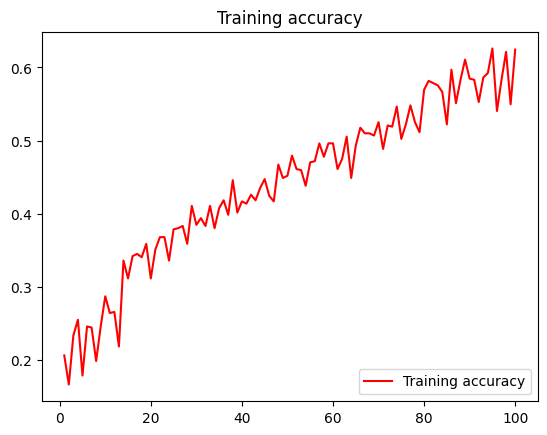

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training accuracy')
plt.legend(loc='lower right')
plt.figure()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  class_names = ['hdpe', 'ldpe', 'other', 'pet', 'pp', 'ps', 'pvc']  # Ganti dengan label kelas yang sesuai

  predicted_class_index = np.argmax(class_names)
  predicted_class_name = class_names[predicted_class_index]

  print(fn)
  print("Prediksi :", predicted_class_name)

Saving kresek.jpg to kresek (3).jpg
kresek.jpg
Prediksi : pvc
